In [1]:
import polars as pl
import pytz
import yfinance as yf
from datetime import datetime, date
import re

In [2]:
df_tqqq = pl.from_pandas( yf.ticker.Ticker("TQQQ").history(interval="30m", start="2025-02-26", end="2025-03-26").reset_index(names="ts_event") )
# df_tqqq = df_tqqq.with_columns(
#     (pl.col("ts_event") - pl.duration(minutes=30)).cast(pl.Datetime("ns", time_zone="America/New_York"))
# )
names_mapping = {
    # "Open": "und_open",
    # "High": "und_high",
    # "Low": "und_low",
    # "Close": "und_close",
    # "Volume": "und_volume",
    "ts_event": "ts_event_date"
}
df_tqqq = df_tqqq.rename( names_mapping )
df_tqqq

ts_event_date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
"datetime[ns, America/New_York]",f64,f64,f64,f64,i64,f64,f64,f64
2025-02-26 09:30:00 EST,78.57,79.402,78.047997,79.269997,11505626,0.0,0.0,0.0
2025-02-26 10:00:00 EST,79.279999,80.050003,78.879997,79.065002,6135649,0.0,0.0,0.0
2025-02-26 10:30:00 EST,79.059998,79.870003,79.059998,79.82,3733923,0.0,0.0,0.0
2025-02-26 11:00:00 EST,79.839996,80.400002,79.830101,79.974998,4207473,0.0,0.0,0.0
2025-02-26 11:30:00 EST,79.970001,80.449898,79.690002,79.780701,3324587,0.0,0.0,0.0
…,…,…,…,…,…,…,…,…
2025-03-25 13:30:00 EDT,66.540001,66.739998,66.530197,66.584999,2102807,0.0,0.0,0.0
2025-03-25 14:00:00 EDT,66.580002,66.995003,66.4701,66.775002,2606132,0.0,0.0,0.0
2025-03-25 14:30:00 EDT,66.785004,66.830002,66.565002,66.7099,2126657,0.0,0.0,0.0


In [3]:
options_hourly_data_file = r"C:\Users\User\Desktop\projects\trading\data\OPRA-20250329-XW7CFKR3PW\opra-pillar-20250226-20250325.ohlcv-1h.csv"

In [4]:
from scipy.optimize import brentq
from scipy.stats import norm
import numpy as np

def black_scholes_price(S, K, T, r, sigma, option_type='C'):
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'C':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

def implied_volatility(S, K, T, r, market_price, option_type='C'):
    if not all( ( S,K,T,r,market_price,option_type ) ):
        print( ( S,K,T,r,market_price,option_type ) )
    try:
        return brentq(
            lambda sigma: black_scholes_price(S, K, T, r, sigma, option_type) - market_price,
            1e-6, 5.0, maxiter=500)
    except ValueError:
        return np.nan


In [5]:
df_options = pl.read_csv(options_hourly_data_file) \
    .with_columns(
        pl.col("symbol").str.split("  ")
    ) \
    .with_columns(
        pl.col("ts_event").str.strptime( pl.Datetime("ns", time_zone=pytz.timezone("America/New_York")) ).alias("ts_event_date"),
        pl.col("symbol").list.get(0).alias("underlying"),
        pl.col("symbol").list.get(-1).str.slice(0, 6).str.strptime(pl.Date, "%y%m%d").cast(pl.Datetime("ns")).dt.replace_time_zone("America/New_York").alias("expiry"),
        pl.col("symbol").list.get(-1).str.slice(6, 1).alias("call_put"),
        (pl.col("symbol").list.get(-1).str.slice(7).cast(pl.Int64) / 1000.0).alias("strike")
    ) \
    .with_columns(
        (pl.col("expiry") - pl.col("ts_event_date")).dt.total_days().alias("days_to_expiry"),
    ) 
    
df_options

ts_event,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol,ts_event_date,underlying,expiry,call_put,strike,days_to_expiry
str,i64,i64,i64,f64,f64,f64,f64,i64,list[str],"datetime[ns, America/New_York]",str,"datetime[ns, America/New_York]",str,f64,i64
"""2025-02-26T14:00:00.000000000Z""",34,32,1426078889,5.4,5.4,5.4,5.4,4,"[""TQQQ"", ""250321P00080000""]",2025-02-26 09:00:00 EST,"""TQQQ""",2025-03-21 00:00:00 EDT,"""P""",80.0,22
"""2025-02-26T14:00:00.000000000Z""",34,29,1426078889,5.4,5.4,5.4,5.4,7,"[""TQQQ"", ""250321P00080000""]",2025-02-26 09:00:00 EST,"""TQQQ""",2025-03-21 00:00:00 EDT,"""P""",80.0,22
"""2025-02-26T14:00:00.000000000Z""",34,35,1442848551,4.0,4.0,4.0,4.0,1,"[""TQQQ"", ""250228P00081000""]",2025-02-26 09:00:00 EST,"""TQQQ""",2025-02-28 00:00:00 EST,"""P""",81.0,1
"""2025-02-26T14:00:00.000000000Z""",34,32,1442865848,2.58,2.58,2.14,2.37,37,"[""TQQQ"", ""250228P00079000""]",2025-02-26 09:00:00 EST,"""TQQQ""",2025-02-28 00:00:00 EST,"""P""",79.0,1
"""2025-02-26T14:00:00.000000000Z""",34,33,1442865848,2.37,2.37,2.37,2.37,1,"[""TQQQ"", ""250228P00079000""]",2025-02-26 09:00:00 EST,"""TQQQ""",2025-02-28 00:00:00 EST,"""P""",79.0,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2025-03-25T19:00:00.000000000Z""",34,22,1426067686,3.97,3.97,3.97,3.97,5,"[""TQQQ"", ""250425P00066000""]",2025-03-25 15:00:00 EDT,"""TQQQ""",2025-04-25 00:00:00 EDT,"""P""",66.0,30
"""2025-03-25T19:00:00.000000000Z""",34,28,1426067686,3.95,3.95,3.95,3.95,4,"[""TQQQ"", ""250425P00066000""]",2025-03-25 15:00:00 EDT,"""TQQQ""",2025-04-25 00:00:00 EDT,"""P""",66.0,30
"""2025-03-25T19:00:00.000000000Z""",34,36,1426067686,3.9,3.9,3.9,3.9,4,"[""TQQQ"", ""250425P00066000""]",2025-03-25 15:00:00 EDT,"""TQQQ""",2025-04-25 00:00:00 EDT,"""P""",66.0,30


In [6]:
other_columns = set(df_options.columns) - {"ts_event", "instrument_id", "publisher_id", "rtype", "open", "high", "low", "close", "volume"}
other_columns

{'call_put',
 'days_to_expiry',
 'expiry',
 'strike',
 'symbol',
 'ts_event_date',
 'underlying'}

In [7]:
df_options = df_options \
    .group_by(["ts_event", "instrument_id"]) \
    .agg([
        pl.col("open").mean(),
        pl.col("high").mean(),
        pl.col("low").mean(),
        pl.col("close").mean(),
        pl.col("volume").sum(),
        *[ pl.col(col).last() for col in other_columns]
    ])
    
df_options

ts_event,instrument_id,open,high,low,close,volume,expiry,call_put,days_to_expiry,underlying,symbol,ts_event_date,strike
str,i64,f64,f64,f64,f64,i64,"datetime[ns, America/New_York]",str,i64,str,list[str],"datetime[ns, America/New_York]",f64
"""2025-03-06T20:00:00.000000000Z""",1426096424,22.15,22.15,22.15,22.15,4,2025-03-21 00:00:00 EDT,"""P""",14,"""TQQQ""","[""TQQQ"", ""250321P00088000""]",2025-03-06 15:00:00 EST,88.0
"""2025-02-28T20:00:00.000000000Z""",1426066860,0.14,0.14,0.14,0.14,100,2025-03-07 00:00:00 EST,"""P""",6,"""TQQQ""","[""TQQQ"", ""250307P00057000""]",2025-02-28 15:00:00 EST,57.0
"""2025-03-06T15:00:00.000000000Z""",1442864914,15.325,15.325,15.325,15.325,4,2025-03-14 00:00:00 EDT,"""C""",7,"""TQQQ""","[""TQQQ"", ""250314C00055000""]",2025-03-06 10:00:00 EST,55.0
"""2025-03-14T14:00:00.000000000Z""",1442873667,1.55,1.621667,1.55,1.621667,66,2025-03-28 00:00:00 EDT,"""C""",13,"""TQQQ""","[""TQQQ"", ""250328C00066000""]",2025-03-14 10:00:00 EDT,66.0
"""2025-03-18T19:00:00.000000000Z""",1442850796,4.7,4.7,4.7,4.7,10,2025-04-04 00:00:00 EDT,"""P""",16,"""TQQQ""","[""TQQQ"", ""250404P00061000""]",2025-03-18 15:00:00 EDT,61.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2025-03-10T15:00:00.000000000Z""",1442852214,8.42875,8.46625,8.23,8.2675,41,2025-06-20 00:00:00 EDT,"""P""",101,"""TQQQ""","[""TQQQ"", ""250620P00060000""]",2025-03-10 11:00:00 EDT,60.0
"""2025-03-12T14:00:00.000000000Z""",1426099400,4.05,4.05,4.05,4.05,1,2025-04-11 00:00:00 EDT,"""P""",29,"""TQQQ""","[""TQQQ"", ""250411P00058000""]",2025-03-12 10:00:00 EDT,58.0
"""2025-03-06T17:00:00.000000000Z""",1426083298,7.165714,7.191429,6.84,6.905714,71,2025-03-07 00:00:00 EST,"""C""",0,"""TQQQ""","[""TQQQ"", ""250307C00060000""]",2025-03-06 12:00:00 EST,60.0


In [8]:
df_options.filter( (pl.col("ts_event") == "2025-02-26T20:00:00.000000000Z") )

ts_event,instrument_id,open,high,low,close,volume,expiry,call_put,days_to_expiry,underlying,symbol,ts_event_date,strike
str,i64,f64,f64,f64,f64,i64,"datetime[ns, America/New_York]",str,i64,str,list[str],"datetime[ns, America/New_York]",f64
"""2025-02-26T20:00:00.000000000Z""",1442859467,6.445,6.445,6.445,6.445,3,2025-06-20 00:00:00 EDT,"""C""",113,"""TQQQ""","[""TQQQ"", ""250620C00086000""]",2025-02-26 15:00:00 EST,86.0
"""2025-02-26T20:00:00.000000000Z""",1426066596,7.45,7.45,7.3,7.3,14,2025-04-17 00:00:00 EDT,"""P""",49,"""TQQQ""","[""TQQQ"", ""250417P00079000""]",2025-02-26 15:00:00 EST,79.0
"""2025-02-26T20:00:00.000000000Z""",1426104207,3.935,3.935,3.935,3.935,402,2025-04-17 00:00:00 EDT,"""C""",49,"""TQQQ""","[""TQQQ"", ""250417C00084000""]",2025-02-26 15:00:00 EST,84.0
"""2025-02-26T20:00:00.000000000Z""",1442865931,4.65,4.65,4.65,4.65,1,2025-02-28 00:00:00 EST,"""C""",1,"""TQQQ""","[""TQQQ"", ""250228C00074500""]",2025-02-26 15:00:00 EST,74.5
"""2025-02-26T20:00:00.000000000Z""",1442860620,12.35,12.35,12.35,12.35,1,2025-03-28 00:00:00 EDT,"""P""",29,"""TQQQ""","[""TQQQ"", ""250328P00088000""]",2025-02-26 15:00:00 EST,88.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2025-02-26T20:00:00.000000000Z""",1426078979,17.75,17.75,17.75,17.75,46,2025-03-21 00:00:00 EDT,"""C""",22,"""TQQQ""","[""TQQQ"", ""250321C00061000""]",2025-02-26 15:00:00 EST,61.0
"""2025-02-26T20:00:00.000000000Z""",1442842829,2.415882,2.778235,2.415882,2.769412,491,2025-02-28 00:00:00 EST,"""C""",1,"""TQQQ""","[""TQQQ"", ""250228C00077000""]",2025-02-26 15:00:00 EST,77.0
"""2025-02-26T20:00:00.000000000Z""",1426094750,20.0,20.0,20.0,20.0,2,2027-01-15 00:00:00 EST,"""C""",687,"""TQQQ""","[""TQQQ"", ""270115C00090000""]",2025-02-26 15:00:00 EST,90.0


In [9]:
df_options.filter( pl.col("days_to_expiry") == 0 )

ts_event,instrument_id,open,high,low,close,volume,expiry,call_put,days_to_expiry,underlying,symbol,ts_event_date,strike
str,i64,f64,f64,f64,f64,i64,"datetime[ns, America/New_York]",str,i64,str,list[str],"datetime[ns, America/New_York]",f64
"""2025-03-21T13:00:00.000000000Z""",1426106864,0.013333,0.013333,0.013333,0.013333,36,2025-03-21 00:00:00 EDT,"""P""",0,"""TQQQ""","[""TQQQ"", ""250321P00051000""]",2025-03-21 09:00:00 EDT,51.0
"""2025-02-27T19:00:00.000000000Z""",1442865997,8.932222,9.164444,8.913333,9.145556,95,2025-02-28 00:00:00 EST,"""P""",0,"""TQQQ""","[""TQQQ"", ""250228P00084000""]",2025-02-27 14:00:00 EST,84.0
"""2025-03-20T13:00:00.000000000Z""",1426096957,2.838182,3.225455,2.838182,3.225455,307,2025-03-21 00:00:00 EDT,"""C""",0,"""TQQQ""","[""TQQQ"", ""250321C00059000""]",2025-03-20 09:00:00 EDT,59.0
"""2025-03-14T13:00:00.000000000Z""",1442854914,0.01,0.01,0.01,0.01,2,2025-03-14 00:00:00 EDT,"""C""",0,"""TQQQ""","[""TQQQ"", ""250314C00082000""]",2025-03-14 09:00:00 EDT,82.0
"""2025-02-28T16:00:00.000000000Z""",1442848686,15.48,15.48,15.13,15.154,30,2025-02-28 00:00:00 EST,"""P""",0,"""TQQQ""","[""TQQQ"", ""250228P00088000""]",2025-02-28 11:00:00 EST,88.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2025-03-14T15:00:00.000000000Z""",1442873639,7.135,7.33,7.055,7.2925,114,2025-03-14 00:00:00 EDT,"""C""",0,"""TQQQ""","[""TQQQ"", ""250314C00054000""]",2025-03-14 11:00:00 EDT,54.0
"""2025-03-07T19:00:00.000000000Z""",1426075468,4.746667,4.746667,4.647778,4.724444,113,2025-03-07 00:00:00 EST,"""P""",0,"""TQQQ""","[""TQQQ"", ""250307P00072000""]",2025-03-07 14:00:00 EST,72.0
"""2025-03-13T16:00:00.000000000Z""",1442848754,11.898571,11.947143,11.81,11.885714,21,2025-03-14 00:00:00 EDT,"""P""",0,"""TQQQ""","[""TQQQ"", ""250314P00070000""]",2025-03-13 12:00:00 EDT,70.0


In [10]:
# .filter( ( pl.col("ts_event_date") < pl.lit("2025-02-27").str.strptime(pl.Datetime("ns", time_zone="America/New_York") ) ) ) \
    
df_sample = df_options \
    .join( df_tqqq, on="ts_event_date", how="left") \
    .filter( (pl.col("days_to_expiry") >= 0) ) \
    .drop_nulls() \
    .filter( ( pl.col("ts_event") == "2025-02-27T20:00:00.000000000Z" )  ) \
    .with_columns(
        pl.struct(["Close", "strike", "days_to_expiry", "close", "call_put"]).map_elements(
            lambda row: implied_volatility(
                S=row["Close"],
                K=row["strike"],
                T=row["days_to_expiry"] / 365,
                r=0.05,
                market_price=row["close"],
                option_type=row["call_put"]
            ),
            return_dtype=pl.Float32
        ).alias("implied_vol")
    ) \
    .filter( pl.col("implied_vol").is_not_nan() ) \
    .sort( pl.col("instrument_id") )
    
df_sample

(72.52999877929688, 88.5, 0.0, 0.05, 16.4, 'P')
(72.52999877929688, 82.5, 0.0, 0.05, 9.93, 'P')
(72.52999877929688, 78.0, 0.0, 0.05, 0.09250000000000001, 'C')
(72.52999877929688, 71.0, 0.0, 0.05, 2.2011111111111106, 'C')
(72.52999877929688, 91.0, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 90.0, 0.0, 0.05, 17.15857142857143, 'P')
(72.52999877929688, 86.0, 0.0, 0.05, 13.275714285714285, 'P')
(72.52999877929688, 92.0, 0.0, 0.05, 18.05, 'P')
(72.52999877929688, 81.0, 0.0, 0.05, 8.7375, 'P')
(72.52999877929688, 89.5, 0.0, 0.05, 18.18, 'P')
(72.52999877929688, 85.0, 0.0, 0.05, 12.323749999999999, 'P')
(72.52999877929688, 65.0, 0.0, 0.05, 7.2700000000000005, 'C')
(72.52999877929688, 72.0, 0.0, 0.05, 1.3774999999999997, 'C')
(72.52999877929688, 80.5, 0.0, 0.05, 0.034166666666666665, 'C')
(72.52999877929688, 88.5, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 93.0, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 83.5, 0.0, 0.05, 0.011666666666666667, 'C')


C:\Users\User\AppData\Local\Temp\ipykernel_7500\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
C:\Users\User\AppData\Local\Temp\ipykernel_7500\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
C:\Users\User\AppData\Local\Temp\ipykernel_7500\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
C:\Users\User\AppData\Local\Temp\ipykernel_7500\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))


(72.52999877929688, 77.0, 0.0, 0.05, 0.12388888888888888, 'C')
(72.52999877929688, 85.0, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 78.0, 0.0, 0.05, 5.525384615384616, 'P')
(72.52999877929688, 89.0, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 83.0, 0.0, 0.05, 0.015555555555555553, 'C')
(72.52999877929688, 79.0, 0.0, 0.05, 6.45, 'P')
(72.52999877929688, 85.5, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 87.0, 0.0, 0.05, 14.780000000000001, 'P')
(72.52999877929688, 72.5, 0.0, 0.05, 1.5905555555555553, 'P')
(72.52999877929688, 84.0, 0.0, 0.05, 11.674545454545454, 'P')
(72.52999877929688, 75.0, 0.0, 0.05, 0.34055555555555544, 'C')
(72.52999877929688, 63.0, 0.0, 0.05, 10.05, 'C')
(72.52999877929688, 86.5, 0.0, 0.05, 13.596363636363636, 'P')
(72.52999877929688, 74.5, 0.0, 0.05, 0.605625, 'C')
(72.52999877929688, 95.0, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 76.5, 0.0, 0.05, 4.313846153846154, 'P')
(72.52999877929688, 94.0, 0.0, 0.05, 21.75, 'P')
(72.52999877929688, 60.0, 0.0, 0.05, 13.25, 'C')
(

C:\Users\User\AppData\Local\Temp\ipykernel_7500\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
C:\Users\User\AppData\Local\Temp\ipykernel_7500\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
C:\Users\User\AppData\Local\Temp\ipykernel_7500\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
C:\Users\User\AppData\Local\Temp\ipykernel_7500\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
C:\Users\User\AppData\Local\Temp\ipykernel_7500\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))


(72.52999877929688, 87.5, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 93.0, 0.0, 0.05, 18.35, 'P')
(72.52999877929688, 86.5, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 74.5, 0.0, 0.05, 2.5545454545454547, 'P')
(72.52999877929688, 79.0, 0.0, 0.05, 0.06499999999999999, 'C')
(72.52999877929688, 67.0, 0.0, 0.05, 0.2092857142857143, 'P')
(72.52999877929688, 62.0, 0.0, 0.05, 0.022500000000000003, 'P')
(72.52999877929688, 73.5, 0.0, 0.05, 0.9566666666666666, 'C')
(72.52999877929688, 92.0, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 68.0, 0.0, 0.05, 0.3023529411764706, 'P')
(72.52999877929688, 83.0, 0.0, 0.05, 10.332500000000001, 'P')
(72.52999877929688, 76.5, 0.0, 0.05, 0.19647058823529412, 'C')
(72.52999877929688, 81.5, 0.0, 0.05, 8.701666666666666, 'P')
(72.52999877929688, 94.0, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 87.0, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 89.0, 0.0, 0.05, 16.45, 'P')
(72.52999877929688, 75.5, 0.0, 0.05, 0.45470588235294124, 'C')
(72.52999877929688, 88.0, 0.0, 0.05, 0

C:\Users\User\AppData\Local\Temp\ipykernel_7500\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
C:\Users\User\AppData\Local\Temp\ipykernel_7500\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))


ts_event,instrument_id,open,high,low,close,volume,expiry,call_put,days_to_expiry,underlying,symbol,ts_event_date,strike,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,implied_vol
str,i64,f64,f64,f64,f64,i64,"datetime[ns, America/New_York]",str,i64,str,list[str],"datetime[ns, America/New_York]",f64,f64,f64,f64,f64,i64,f64,f64,f64,f32
"""2025-02-27T20:00:00.000000000Z""",1426063805,7.79,8.05,7.79,8.05,31,2025-03-21 00:00:00 EDT,"""P""",21,"""TQQQ""","[""TQQQ"", ""250321P00078000""]",2025-02-27 15:00:00 EST,78.0,74.154999,74.199997,72.480003,72.529999,8979593,0.0,0.0,0.0,0.695644
"""2025-02-27T20:00:00.000000000Z""",1426063808,0.336923,0.337692,0.322308,0.323846,516,2025-03-21 00:00:00 EDT,"""C""",21,"""TQQQ""","[""TQQQ"", ""250321C00090000""]",2025-02-27 15:00:00 EST,90.0,74.154999,74.199997,72.480003,72.529999,8979593,0.0,0.0,0.0,0.587305
"""2025-02-27T20:00:00.000000000Z""",1426063812,14.375,14.375,14.375,14.375,2,2025-03-21 00:00:00 EDT,"""P""",21,"""TQQQ""","[""TQQQ"", ""250321P00087000""]",2025-02-27 15:00:00 EST,87.0,74.154999,74.199997,72.480003,72.529999,8979593,0.0,0.0,0.0,0.440336
"""2025-02-27T20:00:00.000000000Z""",1426063815,6.043333,6.492667,6.009333,6.482667,251,2025-03-21 00:00:00 EDT,"""P""",21,"""TQQQ""","[""TQQQ"", ""250321P00075000""]",2025-02-27 15:00:00 EST,75.0,74.154999,74.199997,72.480003,72.529999,8979593,0.0,0.0,0.0,0.750028
"""2025-02-27T20:00:00.000000000Z""",1426063816,0.603333,0.604444,0.597778,0.597778,138,2025-03-21 00:00:00 EDT,"""C""",21,"""TQQQ""","[""TQQQ"", ""250321C00087000""]",2025-02-27 15:00:00 EST,87.0,74.154999,74.199997,72.480003,72.529999,8979593,0.0,0.0,0.0,0.603994
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2025-02-27T20:00:00.000000000Z""",1442875425,5.13,5.138333,5.0,5.008333,70,2025-03-28 00:00:00 EDT,"""C""",28,"""TQQQ""","[""TQQQ"", ""250328C00074000""]",2025-02-27 15:00:00 EST,74.0,74.154999,74.199997,72.480003,72.529999,8979593,0.0,0.0,0.0,0.691887
"""2025-02-27T20:00:00.000000000Z""",1442875426,6.1,6.1,6.055,6.055,26,2025-03-28 00:00:00 EDT,"""P""",28,"""TQQQ""","[""TQQQ"", ""250328P00074000""]",2025-02-27 15:00:00 EST,74.0,74.154999,74.199997,72.480003,72.529999,8979593,0.0,0.0,0.0,0.674412
"""2025-02-27T20:00:00.000000000Z""",1442875427,6.49,6.49,6.49,6.49,1,2025-04-04 00:00:00 EDT,"""P""",35,"""TQQQ""","[""TQQQ"", ""250404P00074000""]",2025-02-27 15:00:00 EST,74.0,74.154999,74.199997,72.480003,72.529999,8979593,0.0,0.0,0.0,0.65627


In [11]:
import plotly.graph_objects as go
import numpy as np
from scipy.interpolate import griddata

# Polars extraction
x = df_sample["strike"].to_numpy()
y = df_sample["days_to_expiry"].to_numpy()
z = df_sample["implied_vol"].to_numpy()

# Create grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot
fig = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi)])
fig.update_layout(
    title='TQQQ Implied Volatility Surface',
    scene=dict(
        xaxis_title='Strike',
        yaxis_title='Days to Expiry',
        zaxis_title='Implied Volatility'
    ),
    width=1000,  # Wider
    height=700,  # Taller
    autosize=False,
    margin=dict(l=40, r=40, b=40, t=40),
)
fig.show()


In [12]:
S=100
K=99
T=30/365
r=0.05
market_price = 49
implied_volatility(S=S, K=K, T=T, r=r, market_price=market_price, option_type="C")

4.556733383735135

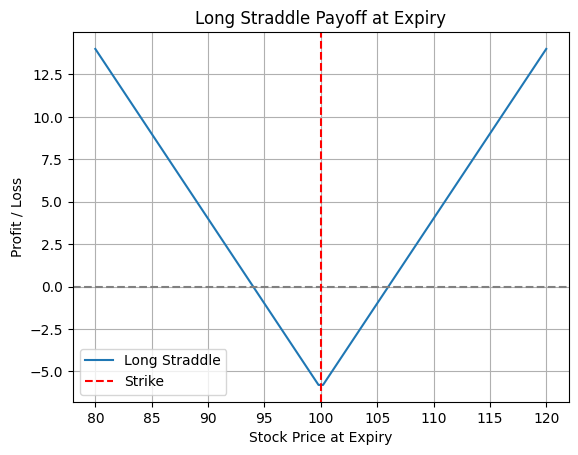

In [13]:
import numpy as np
import matplotlib.pyplot as plt

strike = 100
call_premium = 3
put_premium = 3
total_premium = call_premium + put_premium

prices = np.linspace(80, 120, 100)
call_payoff = np.maximum(prices - strike, 0) - call_premium
put_payoff = np.maximum(strike - prices, 0) - put_premium
straddle_payoff = call_payoff + put_payoff

plt.plot(prices, straddle_payoff, label="Long Straddle")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(strike, color='red', linestyle='--', label="Strike")
plt.title("Long Straddle Payoff at Expiry")
plt.xlabel("Stock Price at Expiry")
plt.ylabel("Profit / Loss")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
import yfinance as yf

In [25]:
tqqq = yf.Ticker("TQQQ")
tqqq.options

('2025-04-17',
 '2025-04-25',
 '2025-05-02',
 '2025-05-09',
 '2025-05-16',
 '2025-05-23',
 '2025-05-30',
 '2025-06-20',
 '2025-09-19',
 '2026-01-16',
 '2027-01-15')

In [16]:
df = tqqq.option_chain( tqqq.options[1] ).calls
df

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,TQQQ250425C00020000,2025-04-11 19:47:00+00:00,20.0,28.80,29.15,32.65,0.0,0.0,NaN,10,2.742191,True,REGULAR,USD
1,TQQQ250425C00022000,2025-04-09 15:42:29+00:00,22.0,17.88,27.20,31.05,0.0,0.0,NaN,1,2.902346,True,REGULAR,USD
2,TQQQ250425C00025000,2025-04-08 14:38:42+00:00,25.0,21.50,24.25,27.85,0.0,0.0,NaN,118,2.402348,True,REGULAR,USD
3,TQQQ250425C00027000,2025-04-10 16:29:48+00:00,27.0,16.65,22.65,25.00,0.0,0.0,NaN,9,1.769532,True,REGULAR,USD
4,TQQQ250425C00028000,2025-04-09 14:49:34+00:00,28.0,13.69,21.85,24.15,0.0,0.0,NaN,9,1.996094,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,TQQQ250425C00085000,2025-04-03 14:06:07+00:00,85.0,0.15,0.00,0.48,0.0,0.0,1.0,408,1.552737,False,REGULAR,USD
81,TQQQ250425C00090000,2025-04-11 16:54:55+00:00,90.0,0.28,0.00,0.24,0.0,0.0,28.0,220,1.507815,False,REGULAR,USD
82,TQQQ250425C00095000,2025-04-01 19:48:18+00:00,95.0,0.84,0.00,0.50,0.0,0.0,1.0,294,1.820313,False,REGULAR,USD
83,TQQQ250425C00100000,2025-04-09 18:03:07+00:00,100.0,0.07,0.00,0.16,0.0,0.0,14.0,418,1.640627,False,REGULAR,USD


In [18]:
dict(df.dtypes)

{'contractSymbol': dtype('O'),
 'lastTradeDate': datetime64[ns, UTC],
 'strike': dtype('float64'),
 'lastPrice': dtype('float64'),
 'bid': dtype('float64'),
 'ask': dtype('float64'),
 'change': dtype('float64'),
 'percentChange': dtype('float64'),
 'volume': dtype('float64'),
 'openInterest': dtype('int64'),
 'impliedVolatility': dtype('float64'),
 'inTheMoney': dtype('bool'),
 'contractSize': dtype('O'),
 'currency': dtype('O')}

In [26]:
df_options = pl.DataFrame(schema={
    'contractSymbol': pl.String,
    'lastTradeDate': pl.Datetime("ns", "UTC"),
    'strike': pl.Float64,
    'lastPrice': pl.Float64,
    'bid': pl.Float64,
    'ask': pl.Float64,
    'change': pl.Float64,
    'percentChange': pl.Float64,
    'volume': pl.Int64,
    'openInterest': pl.Int64,
    'impliedVolatility': pl.Float64,
    'inTheMoney': pl.Boolean,
    'contractSize': pl.String,
    'currency': pl.String,
})

for exp in tqqq.options:
    for option_type in ["calls", "puts"]:
        df = getattr(tqqq.option_chain( exp ), option_type)
        df_options = df_options.vstack( pl.from_pandas(df).cast(df_options.schema) )

In [27]:
def get_days_to_expiry( contract_symbol ):
    pattern = r"([A-Z]+)(\d+)([C|P])(\d+)"
    matched = re.match( pattern, contract_symbol)
    if matched:
        expiry_date = datetime.strptime( matched.group(2), "%y%m%d").date()
        now_nyctz = datetime.now( pytz.timezone("America/New_York") )
        days_to_expiry = (expiry_date - now_nyctz.date()).days
        return days_to_expiry

df_options = df_options.with_columns(
    pl.col("lastTradeDate").dt.convert_time_zone("America/New_York")
).with_columns(
    pl.col("contractSymbol").map_elements( get_days_to_expiry, return_dtype=pl.Int64 ).alias("days_to_expiry")
)
df_options

contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,days_to_expiry
str,"datetime[ns, America/New_York]",f64,f64,f64,f64,f64,f64,i64,i64,f64,bool,str,str,i64
"""TQQQ250417C00020000""",2025-04-11 12:39:46 EDT,20.0,28.07,28.25,31.9,0.0,0.0,null,11,7.339845,true,"""REGULAR""","""USD""",3
"""TQQQ250417C00021000""",2025-04-09 13:42:19 EDT,21.0,26.4,27.7,31.05,0.0,0.0,null,1,7.441407,true,"""REGULAR""","""USD""",3
"""TQQQ250417C00023000""",2025-04-11 15:43:50 EDT,23.0,28.88,25.5,28.9,3.1099987,12.068292,1,7,6.529299,true,"""REGULAR""","""USD""",3
"""TQQQ250417C00023500""",2025-04-11 14:08:14 EDT,23.5,25.12,24.45,28.4,0.0,0.0,null,2,5.988284,true,"""REGULAR""","""USD""",3
"""TQQQ250417C00025000""",2025-04-14 09:52:05 EDT,25.0,25.76,23.05,26.9,4.790001,22.842161,1,60,5.636722,true,"""REGULAR""","""USD""",3
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""TQQQ270115P00110000""",2025-04-04 12:31:42 EDT,110.0,68.0,59.0,63.5,0.0,0.0,341,326,0.483892,true,"""REGULAR""","""USD""",641
"""TQQQ270115P00115000""",2025-03-10 13:33:56 EDT,115.0,57.5,64.5,69.2,0.0,0.0,1,4,0.541203,true,"""REGULAR""","""USD""",641
"""TQQQ270115P00120000""",2025-03-24 09:30:01 EDT,120.0,57.5,67.55,71.85,0.0,0.0,10,59,0.380133,true,"""REGULAR""","""USD""",641


In [23]:
df_options.filter( pl.col("contractSymbol").is_in(["TQQQ250417C00051000", "TQQQ250417P00051000", "TQQQ250417P00046000", "TQQQ250417C00056000"]))

contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,days_to_expiry
str,"datetime[ns, America/New_York]",f64,f64,f64,f64,f64,f64,i64,i64,f64,bool,str,str,i64
"""TQQQ250417C00051000""",2025-04-14 10:33:48 EDT,51.0,2.52,2.48,2.52,0.44,21.15385,4955,3395,1.244144,false,"""REGULAR""","""USD""",3
"""TQQQ250417C00056000""",2025-04-14 10:34:40 EDT,56.0,0.51,0.5,0.52,-0.06,-10.526316,3325,5705,0.998047,false,"""REGULAR""","""USD""",3
"""TQQQ250417P00046000""",2025-04-14 10:33:36 EDT,46.0,0.76,0.77,0.79,-1.53,-66.812225,1309,3367,1.214848,false,"""REGULAR""","""USD""",3
"""TQQQ250417P00051000""",2025-04-14 10:33:31 EDT,51.0,2.23,2.19,2.22,-2.22,-49.887638,1836,751,0.969727,true,"""REGULAR""","""USD""",3


In [24]:
0.79 - (2.48+2.19) + 0.52

-3.36

In [28]:
df_options.filter( pl.col("contractSymbol").is_in(["TQQQ250417C00051000", "TQQQ250417P00051000", "TQQQ250417P00046000", "TQQQ250417C00056000"]))

contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,days_to_expiry
str,"datetime[ns, America/New_York]",f64,f64,f64,f64,f64,f64,i64,i64,f64,bool,str,str,i64
"""TQQQ250417C00051000""",2025-04-14 11:30:14 EDT,51.0,1.73,1.77,1.79,-0.35,-16.431923,8702,3395,1.340824,false,"""REGULAR""","""USD""",3
"""TQQQ250417C00056000""",2025-04-14 11:29:03 EDT,56.0,0.33,0.32,0.34,-0.24,-42.10526,4043,5705,1.10352,false,"""REGULAR""","""USD""",3
"""TQQQ250417P00046000""",2025-04-14 11:30:00 EDT,46.0,1.21,1.23,1.25,-1.08,-47.161568,2071,3367,1.184574,false,"""REGULAR""","""USD""",3
"""TQQQ250417P00051000""",2025-04-14 11:29:19 EDT,51.0,3.0,3.0,3.05,-1.45,-32.584267,3398,751,0.771487,true,"""REGULAR""","""USD""",3


In [22]:
import plotly.graph_objects as go
import numpy as np
from scipy.interpolate import griddata

# Polars extraction
x = df_options["strike"].to_numpy()
y = df_options["days_to_expiry"].to_numpy()
z = df_options["impliedVolatility"].to_numpy()

# Create grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot
fig = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi)])
fig.update_layout(
    title='TQQQ Implied Volatility Surface',
    scene=dict(
        xaxis_title='Strike',
        yaxis_title='Days to Expiry',
        zaxis_title='Implied Volatility'
    ),
    width=1000,  # Wider
    height=700,  # Taller
    autosize=False,
    margin=dict(l=40, r=40, b=40, t=40),
)
fig.show()